# Project 01 - Classify the 10 digits using MNIST data

Implemented the convolutional neural network using purely numpy to classify the digits.

## Data Description
[MNIST](https://en.wikipedia.org/wiki/MNIST_database)

In [ ]:
# load the mnist data
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml

In [ ]:
mnist_28 = fetch_openml('mnist_784')

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
mnist_28_img= mnist_28.data.to_numpy()

In [ ]:
mnist_28_img.shape

(70000, 784)

In [ ]:
#display one image
import matplotlib.pyplot as plt

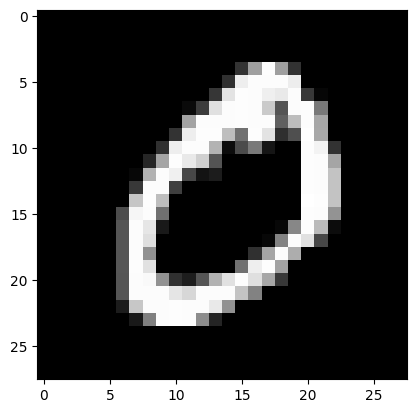

In [ ]:
plt.imshow((mnist_28_img[1].reshape(28,28)), cmap=plt.cm.gray)

In [ ]:
mnist = fetch_openml('mnist_784')
X = mnist.data.to_numpy()
y = mnist.target.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print('Size of training set:', len(X_train))
print('Size of testing set:', len(X_test))

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Size of training set: 49000
Size of testing set: 21000


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

# Convert the input data to a NumPy array
X = mnist_28.data.astype("float32")

# Convert the target labels to a NumPy array
y = mnist_28.target.astype("int")

# Create a LabelBinarizer object
lb = LabelBinarizer()

# One-hot encode the target labels
y_one_hot = lb.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y_one_hot, test_size=0.3, random_state=42
)


In [ ]:
import numpy as np
import pandas as pd

class DataPreprocessor:
    def __init__(self, X_train, X_test):
        self.X_train = X_train
        self.X_test = X_test

    def reshape_data(self):
        """Reshapes the NumPy arrays to the expected format."""
        self.X_train = self.X_train.values.reshape(-1, 28, 28, 1)
        self.X_test = self.X_test.values.reshape(-1, 28, 28, 1)

    def normalize_data(self):
        """Normalizes the pixel values between 0 and 1."""
        self.X_train = self.X_train.astype('float32') / 255
        self.X_test = self.X_test.astype('float32') / 255

    def get_preprocessed_data(self):
        """Returns the preprocessed training and testing data."""
        return self.X_train, self.X_test

# Assuming X_train and X_test are DataFrames, and you have loaded your data
# Create a data preprocessor object
data_preprocessor = DataPreprocessor(X_train, X_test)

# Preprocess the data
data_preprocessor.reshape_data()
data_preprocessor.normalize_data()

# Get the preprocessed training and testing data
X_train_preprocessed, X_test_preprocessed = data_preprocessor.get_preprocessed_data()


In [ ]:
def test_train_shape(X_train, X_test):
    print("Training data shape:", X_train.shape)
    print("Testing data shape:", X_test.shape)

# Call the check_shape function
test_train_shape(X_train, X_test)

Training data shape: (49000, 784)
Testing data shape: (21000, 784)


## Implementing a neural network using the ReLU activation function

In [ ]:
import numpy as np

def relu(x):
    return np.maximum(0, x)

# Define relu_derivative
def relu_derivative(x):
    return np.where(x > 0, 1, 0)

class NeuralNetwork:
    def __init__(self, num_layers, num_neurons_per_layer, learning_rate):
        self.num_layers = num_layers
        self.num_neurons_per_layer = num_neurons_per_layer
        self.learning_rate = learning_rate

        # Initialize the weights and biases
        self.weights = []
        self.biases = []
        for i in range(num_layers - 1):
            self.weights.append(np.random.randn(num_neurons_per_layer[i], num_neurons_per_layer[i + 1]))
            self.biases.append(np.zeros(num_neurons_per_layer[i + 1]))

    def forward_propagation(self, X):
        layer_input = X
        layer_outputs = [layer_input]

        for i in range(self.num_layers - 1):
            layer_input = relu(np.dot(layer_input, self.weights[i]) + self.biases[i])
            layer_outputs.append(layer_input)

        return layer_outputs

    def backward_propagation(self, X, y, layer_outputs):
        num_layers = len(layer_outputs) - 1
        output_error = y - layer_outputs[num_layers]
        delta = output_error * relu_derivative(layer_outputs[num_layers])

        for i in range(num_layers, 0, -1):
            self.weights[i - 1] += self.learning_rate * np.dot(layer_outputs[i - 1].T, delta)
            self.biases[i - 1] += self.learning_rate * np.sum(delta, axis=0)
            delta = np.dot(delta, self.weights[i - 1].T) * relu_derivative(layer_outputs[i - 1])

    def predict(self, X):
        layer_outputs = self.forward_propagation(X)
        prediction = layer_outputs[-1]
        return prediction

    def calculate_accuracy(self, predictions, true_labels):
        num_samples = true_labels.shape[0]
        res_predict = np.sum(np.argmax(predictions, axis=1) == np.argmax(true_labels, axis=1))
        model_accuracy = res_predict / num_samples
        return model_accuracy

    def train(self, X, y, epochs):
        for epoch in range(epochs):
            layer_outputs = self.forward_propagation(X)
            self.backward_propagation(X, y, layer_outputs)


In [ ]:
epochs = 100
no_layers = 3
no_neurons = [784, 128, 10]
model_learning_rate = 0.01


model = NeuralNetwork(no_layers, no_neurons, model_learning_rate)
model.train(X_train, y_train, epochs)
prediction = model.predict(X_test)
model_accuracy = model.calculate_accuracy(prediction, y_test)
print("Accuracy:", model_accuracy)


Accuracy: 0.098


inter

##Neural Network with Sigmoid Activation and Regularization for Image Classification

In [ ]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

In [ ]:
def initialize_weights(no_layers, no_neurons):
    weights = []
    for i in range(no_layers - 1):
        weights.append(np.random.randn(no_neurons[i], no_neurons[i + 1]) * np.sqrt(2 / no_neurons[i]))
    return weights

In [ ]:
class NeuralNetwork:
    def __init__(self, no_layers, no_neurons, model_learning_rate, activation_function, regularization_lambda):
        self.no_layers = no_layers
        self.no_neurons = no_neurons
        self.model_learning_rate = model_learning_rate
        self.activation_function = activation_function
        self.regularization_lambda = regularization_lambda
        self.weights = initialize_weights(no_layers=no_layers, no_neurons=no_neurons)

    def forward_propagation(self, X):
        layer_input = X
        layer_outputs = [layer_input]
        for i in range(self.no_layers - 1):
            layer_input = self.activation_function(np.dot(layer_input, self.weights[i]))
            layer_outputs.append(layer_input)
        return layer_outputs

    def backward_propagation(self, X, y, layer_outputs):
        no_layers = len(layer_outputs) - 1
        output_error = y - layer_outputs[no_layers]
        delta = output_error * sigmoid_derivative(layer_outputs[no_layers])
        for i in range(no_layers, 0, -1):
            self.weights[i - 1] += self.model_learning_rate * (np.dot(layer_outputs[i - 1].T, delta) - self.regularization_lambda * self.weights[i - 1])
            delta = np.dot(delta, self.weights[i - 1].T) * sigmoid_derivative(layer_outputs[i - 1])

    def predict(self, X):
        layer_outputs = self.forward_propagation(X)
        prediction = layer_outputs[-1]
        return prediction

    def calculate_accuracy(self, predictions, true_labels):
        num_samples = true_labels.shape[0]
        res_predict = np.sum(np.argmax(predictions, axis=1) == np.argmax(true_labels, axis=1))
        model_accuracy = res_predict / num_samples
        return model_accuracy

    def train(self, X, y, epochs):
        for epoch in range(epochs):
            layer_outputs = self.forward_propagation(X)
            self.backward_propagation(X, y, layer_outputs)

In [ ]:
epochs = 100
no_layers = 3
no_neurons = [784, 128, 10]
model_learning_rate = 0.01
regularization_lambda = 0.01
activation_function = sigmoid

model = NeuralNetwork(no_layers, no_neurons, model_learning_rate, activation_function, regularization_lambda)
model.train(X_train, y_train, epochs)

prediction = model.predict(X_test)

model_accuracy = model.calculate_accuracy(prediction, y_test)
print("Accuracy:", model_accuracy)

<ipython-input-13-58ac12a57fa0>:4: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Accuracy: 0.10157142857142858


inter

## Softmax Regression with Regularization for Image Classification.

In [ ]:
import numpy as np

# Example data (replace with your actual training data)
num_samples = 49000

image_size = 28 * 28
num_classes = 10

train_images = np.random.rand(num_samples, image_size)
train_labels = np.random.randint(0, num_classes, num_samples)
# Example data (replace with your actual test data)
num_test_samples = 21000  # Replace with the number of test samples you have
test_images = np.random.rand(num_test_samples, image_size)
test_labels = np.random.randint(0, num_classes, num_test_samples)


21000


In [ ]:
import numpy as np

# Example data (replace with your actual training and test data)
num_train_samples = 49000
num_test_samples = 21000
image_size = 28 * 28
num_classes = 10

train_images = np.random.rand(num_train_samples, image_size)
train_labels = np.random.randint(0, num_classes, num_train_samples)
test_images = np.random.rand(num_test_samples, image_size)
test_labels = np.random.randint(0, num_classes, num_test_samples)

class Softmax:
    def __init__(self, input_node, softmax_node):
        self.weight = np.random.randn(input_node, softmax_node) / np.sqrt(input_node)
        self.bias = np.zeros(softmax_node)
        self.modified_input = None

    def forward_prop(self, image, label=None):
        image_normalized = (image / 255) - 0.5
        logits = np.dot(image_normalized, self.weight) + self.bias
        max_logit = np.max(logits)
        exp_logits = np.exp(logits - max_logit)
        out_p = exp_logits / np.sum(exp_logits)

        if label is not None:
            cross_ent_loss = -np.log(out_p[label] + 1e-8)  # Add a small constant to avoid log(0)
            return out_p, cross_ent_loss
        else:
            return out_p

    def back_prop(self, dL_dout, learning_rate):
        dL_dw = np.outer(self.modified_input, dL_dout)
        dL_db = dL_dout
        self.weight -= learning_rate * dL_dw
        self.bias -= learning_rate * dL_db

    def train(self, image, label, learning_rate=0.001):
        self.modified_input = image.flatten()
        out_p, loss = self.forward_prop(image, label)
        gradient = np.zeros(10)
        gradient[label] = 1
        self.back_prop(out_p - gradient, learning_rate)
        accuracy_eval = 1 if np.argmax(out_p) == label else 0

        return loss, accuracy_eval

softmax = Softmax(28 * 28, 10)

num_epochs = 2
learning_rate = 0.001

for epoch in range(num_epochs):
    print('Epoch', epoch + 1)

    # Shuffle the training data
    shuffle_indices = np.random.permutation(num_train_samples)
    train_images = train_images[shuffle_indices]
    train_labels = train_labels[shuffle_indices]

    loss = 0
    num_correct = 0

    for i, (im, label) in enumerate(zip(train_images, train_labels)):
        if i % 1000 == 0:
            avg_loss = loss / 1000
            avg_accuracy = num_correct / 10
            print(f'{i // 1000 + 1} steps out of 49 steps: Average_loss: {avg_loss:.5f} and Accuracy: {avg_accuracy:.2f}')
            loss = 0
            num_correct = 0

        l1, accu = softmax.train(im, label, learning_rate)
        loss += l1
        num_correct += accu

print('Testing')
loss = 0
num_correct = 0
for im, label in zip(test_images, test_labels):
    out_p = softmax.forward_prop(im)
    loss += out_p[label]
    num_correct += 1 if np.argmax(out_p) == label else 0

num_tests = len(test_images)
print(f'Test loss: {loss / num_tests:.5f}')
print(f'Test Accuracy: {num_correct * 1000 / num_tests:.2f}%')


Epoch 1
1 steps out of 49 steps: Average_loss: 0.00000 and Accuracy: 0.00
2 steps out of 49 steps: Average_loss: 14.75268 and Accuracy: 11.00
3 steps out of 49 steps: Average_loss: 16.57861 and Accuracy: 10.00
4 steps out of 49 steps: Average_loss: 16.35756 and Accuracy: 11.20
5 steps out of 49 steps: Average_loss: 16.32072 and Accuracy: 11.40
6 steps out of 49 steps: Average_loss: 16.59703 and Accuracy: 9.90
7 steps out of 49 steps: Average_loss: 16.81808 and Accuracy: 8.70
8 steps out of 49 steps: Average_loss: 16.68914 and Accuracy: 9.40
9 steps out of 49 steps: Average_loss: 16.41283 and Accuracy: 10.90
10 steps out of 49 steps: Average_loss: 16.59703 and Accuracy: 9.90
11 steps out of 49 steps: Average_loss: 16.63387 and Accuracy: 9.70
12 steps out of 49 steps: Average_loss: 16.37599 and Accuracy: 11.10
13 steps out of 49 steps: Average_loss: 16.28388 and Accuracy: 11.60
14 steps out of 49 steps: Average_loss: 16.63387 and Accuracy: 9.70
15 steps out of 49 steps: Average_loss: 16.

## Implementation of convolutional Layer

In [ ]:
import numpy as np

# Define the activation function (e.g., ReLU)
def relu(x):
    return np.maximum(0, x)

# Define the softmax function
def softmax(x):
    exp_x = np.exp(x - np.max(x))
    return exp_x / exp_x.sum(axis=0, keepdims=True)

# Load and preprocess your dataset (replace this with your data loading code)
# Make sure your data is loaded into train_images, train_labels, test_images, and test_labels

# Data preprocessing (normalize, reshape, etc.)
def preprocess_data(images):
    images = images / 255.0  # Normalize pixel values to the range [0, 1]
    images = images.reshape(images.shape[0], -1)  # Flatten images
    return images

train_images = preprocess_data(train_images)
test_images = preprocess_data(test_images)

# Define the neural network architecture
input_size = train_images.shape[1]
hidden_size = 128
output_size = 10

# Initialize weights and biases
np.random.seed(0)
weights_input_hidden = np.random.randn(hidden_size, input_size) * 0.01
bias_hidden = np.zeros((hidden_size, 1))
weights_hidden_output = np.random.randn(output_size, hidden_size) * 0.01
bias_output = np.zeros((output_size, 1))

# Hyperparameters
learning_rate = 0.1
num_epochs = 10
batch_size = 32

# Training loop
for epoch in range(num_epochs):
    for i in range(0, len(train_images), batch_size):
        batch_images = train_images[i:i+batch_size]
        batch_labels = train_labels[i:i+batch_size]

        # Forward pass
        z1 = np.dot(weights_input_hidden, batch_images.T) + bias_hidden
        a1 = relu(z1)
        z2 = np.dot(weights_hidden_output, a1) + bias_output
        a2 = softmax(z2)

        # Compute loss (cross-entropy)
        m = batch_labels.shape[0]
        loss = -np.log(a2[batch_labels, range(m)]).mean()

        # Backpropagation
        dz2 = a2
        dz2[batch_labels, range(m)] -= 1
        dw2 = np.dot(dz2, a1.T) / m
        db2 = np.sum(dz2, axis=1, keepdims=True) / m
        dz1 = np.dot(weights_hidden_output.T, dz2) * (a1 > 0)
        dw1 = np.dot(dz1, batch_images) / m
        db1 = np.sum(dz1, axis=1, keepdims=True) / m

        # Update weights and biases
        weights_hidden_output -= learning_rate * dw2
        bias_output -= learning_rate * db2
        weights_input_hidden -= learning_rate * dw1
        bias_hidden -= learning_rate * db1

    # Print loss for this epoch
    print(f"Epoch {epoch + 1}, Loss: {loss:.4f}")

# Testing
test_z1 = np.dot(weights_input_hidden, test_images.T) + bias_hidden
test_a1 = relu(test_z1)
test_z2 = np.dot(weights_hidden_output, test_a1) + bias_output
test_a2 = softmax(test_z2)

predictions = np.argmax(test_a2, axis=0)
accuracy = (predictions == test_labels).mean()

print(f"Test Accuracy: {accuracy * 100:.2f}%")import numpy as np

class Conv2dLayer:
    def __init__(self, in_channels, out_channels, kernel_size, stride):
        self.in_channels = in_channels
        self.out_channels = out_channels
        self.kernel_size = kernel_size
        self.stride = stride

        # Initialize the weights and biases
        self.weights = np.random.randn(out_channels, in_channels, kernel_size, kernel_size)
        self.biases = np.zeros((out_channels,))

        # Store the input and output shapes for later use
        self.input_shape = None
        self.output_shape = None

    def forward(self, x):
        self.input_shape = x.shape
        batch_size, in_channels, in_height, in_width = x.shape
        out_height = int((in_height - self.kernel_size) / self.stride) + 1
        out_width = int((in_width - self.kernel_size) / self.stride) + 1

        self.output_shape = (batch_size, self.out_channels, out_height, out_width)

        # Initialize the output
        output = np.zeros(self.output_shape)

        # Perform the forward pass
        for i in range(out_height):
            for j in range(out_width):
                h_start = i * self.stride
                h_end = h_start + self.kernel_size
                w_start = j * self.stride
                w_end = w_start + self.kernel_size

                x_slice = x[:, :, h_start:h_end, w_start:w_end]

                # Perform the convolution operation
                output[:, :, i, j] = np.sum(x_slice * self.weights, axis=(1, 2, 3)) + self.biases

        return output

    def backward(self, d_out):
        batch_size, out_channels, out_height, out_width = d_out.shape

        # Initialize the gradients
        d_weights = np.zeros(self.weights.shape)
        d_biases = np.sum(d_out, axis=(0, 2, 3))
        d_input = np.zeros(self.input_shape)

        for i in range(out_height):
            for j in range(out_width):
                h_start = i * self.stride
                h_end = h_start + self.kernel_size
                w_start = j * self.stride
                w_end = w_start + self.kernel_size

                x_slice = x[:, :, h_start:h_end, w_start:w_end]

                for k in range(out_channels):
                    d_weights[k, :, :, :] += np.sum(x_slice * d_out[:, k, i, j][:, np.newaxis, np.newaxis, np.newaxis], axis=0)
                    d_input[:, :, h_start:h_end, w_start:w_end] += self.weights[k, :, :, :] * d_out[:, k, i, j][:, np.newaxis, np.newaxis, np.newaxis]

        return d_input, d_weights, d_biases

# Create an example input
x = np.random.randn(2, 3, 6, 6)

# Create a convolutional layer
conv_layer = Conv2dLayer(in_channels=3, out_channels=2, kernel_size=3, stride=2)

# Forward pass
output = conv_layer.forward(x)
print("Forward Pass Output:")
print(output)

# Compute a random gradient for demonstration
d_out = np.random.randn(2, 2, 2, 2)

# Backward pass
d_input, d_weights, d_biases = conv_layer.backward(d_out)
print("\nBackward Pass - Gradient w.r.t. Input:")
print(d_input)
print("\nBackward Pass - Gradient w.r.t. Weights:")
print(d_weights)
print("\nBackward Pass - Gradient w.r.t. Biases:")
print(d_biases)



Epoch 1, Loss: 2.3016
Epoch 2, Loss: 2.3015
Epoch 3, Loss: 2.3016
Epoch 4, Loss: 2.3016
Epoch 5, Loss: 2.3016
Epoch 6, Loss: 2.3016
Epoch 7, Loss: 2.3016
Epoch 8, Loss: 2.3016
Epoch 9, Loss: 2.3016
Epoch 10, Loss: 2.3015
Test Accuracy: 9.95%
